# Effect of ARID1A mutation on interacting protein abundance

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import CPTAC.Endometrial as CPTAC

Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
trans = CPTAC.get_transcriptomics()

## Effect of ARID1A mutation on interacting protein abundance in tumor patients

In [3]:
protList = ['RUNX1','DPF2','EZH2','TP53','ARID1B','BAF250B','SMARCA4','BRG1','BAF190A','SMARCA2','BRM','BAF190B','SMARCE1','ACTL6A','BAF53','SMARCC1','BAF155','SMARCC2','BAF170','SMARCB1','SNF5','BAF47','PHF10','SMARCA1','SMARCD1','SMARCD2']
pcutoff = 0.05/ len(protList)
gene = 'ARID1A'



#print(proteomics['EZH2'])

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[~cross.Patient_Type.str.contains('Normal')]
        cross = cross.loc[cross['Patient_Type'] == 'Tumor'].drop("Patient_Type", axis = 1)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] != "Wildtype"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for DPF2: 
Ttest_indResult(statistic=-6.081953553481341, pvalue=2.2948807467387887e-08)
Test for SMARCE1: 
Ttest_indResult(statistic=-4.130078363004059, pvalue=7.634934239543734e-05)
Test for SMARCC2: 
Ttest_indResult(statistic=-4.048439830624606, pvalue=0.00010309944017513439)
Test for SMARCB1: 
Ttest_indResult(statistic=-4.518437769374729, pvalue=1.7419120367050688e-05)
Test for SMARCD1: 
Ttest_indResult(statistic=-3.8723121521655464, pvalue=0.00019459950889299838)


## Plot all of the significant results 

In [4]:
plotdf = CPTAC.compare_mutations(proteomics, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation', gene]]
#print(plotdf)

sigResults = sigResults[:5]
print(sigResults)
for protein in sigResults:
    if(protein != 'ARID1A'):
        proteindf = CPTAC.compare_mutations(proteomics, protein, gene)[[protein]]
        print(proteindf)
        plotdf = plotdf.join(proteindf)
print(plotdf)

['DPF2', 'SMARCE1', 'SMARCC2', 'SMARCB1', 'SMARCD1']
          DPF2
S001 -0.548000
S002 -0.919000
S003 -0.555000
S004  0.563000
S005  0.372000
S006 -0.642000
S007 -0.025700
S008  0.187000
S009  0.709000
S010 -0.092800
S011 -0.050500
S012 -0.823000
S013 -0.527000
S014 -0.911000
S015  0.531000
S016  0.628000
S017  0.129000
S018 -0.142000
S019 -0.316000
S020 -0.323000
S021  0.094000
S022 -0.147000
S023  0.136000
S024 -0.535000
S025  0.089200
S026 -0.039500
S027 -0.497000
S028 -0.138000
S029 -0.455000
S030 -1.040000
...        ...
S124  0.095700
S125  0.000263
S126 -0.026100
S127  0.181000
S128  0.365000
S129  0.211000
S130  0.255000
S131  0.197000
S132  0.181000
S133  0.002780
S134 -0.138000
S135 -0.095500
S136  0.366000
S137  0.295000
S138  0.174000
S139 -0.060500
S140  0.415000
S141 -0.000074
S142  0.241000
S143  0.393000
S144  0.315000
S145  0.056900
S146  0.346000
S147  0.125000
S148  0.347000
S149  0.340000
S150  0.101000
S151 -0.109000
S152 -0.230000
S153  0.187000

[153 rows x 1 co

In [5]:
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Mutation'
                                     }})

In [6]:
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Protein', value_name='Signal')
#plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)
print(plotdf)

     Mutation  Protein   Signal
0    Mutation   ARID1A -0.87900
1    Mutation   ARID1A -1.41000
2     Control   ARID1A -1.04000
3     Control   ARID1A  0.82700
4     Control   ARID1A  0.38500
5     Control   ARID1A  0.01060
6     Control   ARID1A  0.20200
7    Mutation   ARID1A  0.06220
8     Control   ARID1A  0.73500
9     Control   ARID1A  0.51900
10    Control   ARID1A -0.08670
11   Mutation   ARID1A -1.61000
12    Control   ARID1A  0.11200
13   Mutation   ARID1A -1.54000
14    Control   ARID1A  0.76700
15    Control   ARID1A  0.73300
16    Control   ARID1A  0.50400
17   Mutation   ARID1A  0.19500
18   Mutation   ARID1A -0.20900
19    Control   ARID1A -0.03840
20    Control   ARID1A  0.26900
21   Mutation   ARID1A  0.22500
22   Mutation   ARID1A  0.14900
23   Mutation   ARID1A -0.99200
24    Control   ARID1A  0.39300
25   Mutation   ARID1A -0.11300
26   Mutation   ARID1A  0.13700
27    Control   ARID1A -0.30200
28    Control   ARID1A  0.03300
29   Mutation   ARID1A -1.19000
..      

In [7]:
''''plotdf = None
for protein in sigResults:
    tempdf = CPTAC.compare_mutations(proteomics, protein, gene)
    tempdf = tempdf.loc[tempdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    
    tempdf['Protein'] = protein
    #tempdf['Signal'] = tempdf[protein]
    print(tempdf)
    
    #Mark all types of mutations as 'mutation'
    
    mutation_types = ['Missense_Mutation', 'Nonsense_Mutation', 'Frame_Shift_Del', 'Frame_Shift_Ins']
    mutateddf = tempdf.loc[tempdf['Mutation'] != 'Wildtype']
    indices = mutateddf.index.tolist()
    tempdf.loc[indices, 'Mutation'] = 'Mutation'
    
    #tempdf.loc[indices, 'Mutation'] = 'Mutation'
    #tempdf.loc[tempdf['Mutation'] != 'Wildtype'] = 'Mutation'
    if plotdf is None:
        plotdf = tempdf
    else:
        plotdf = plotdf.append(tempdf)
        
print(plotdf) '''

"'plotdf = None\nfor protein in sigResults:\n    tempdf = CPTAC.compare_mutations(proteomics, protein, gene)\n    tempdf = tempdf.loc[tempdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)\n    \n    tempdf['Protein'] = protein\n    #tempdf['Signal'] = tempdf[protein]\n    print(tempdf)\n    \n    #Mark all types of mutations as 'mutation'\n    \n    mutation_types = ['Missense_Mutation', 'Nonsense_Mutation', 'Frame_Shift_Del', 'Frame_Shift_Ins']\n    mutateddf = tempdf.loc[tempdf['Mutation'] != 'Wildtype']\n    indices = mutateddf.index.tolist()\n    tempdf.loc[indices, 'Mutation'] = 'Mutation'\n    \n    #tempdf.loc[indices, 'Mutation'] = 'Mutation'\n    #tempdf.loc[tempdf['Mutation'] != 'Wildtype'] = 'Mutation'\n    if plotdf is None:\n        plotdf = tempdf\n    else:\n        plotdf = plotdf.append(tempdf)\n        \nprint(plotdf) "

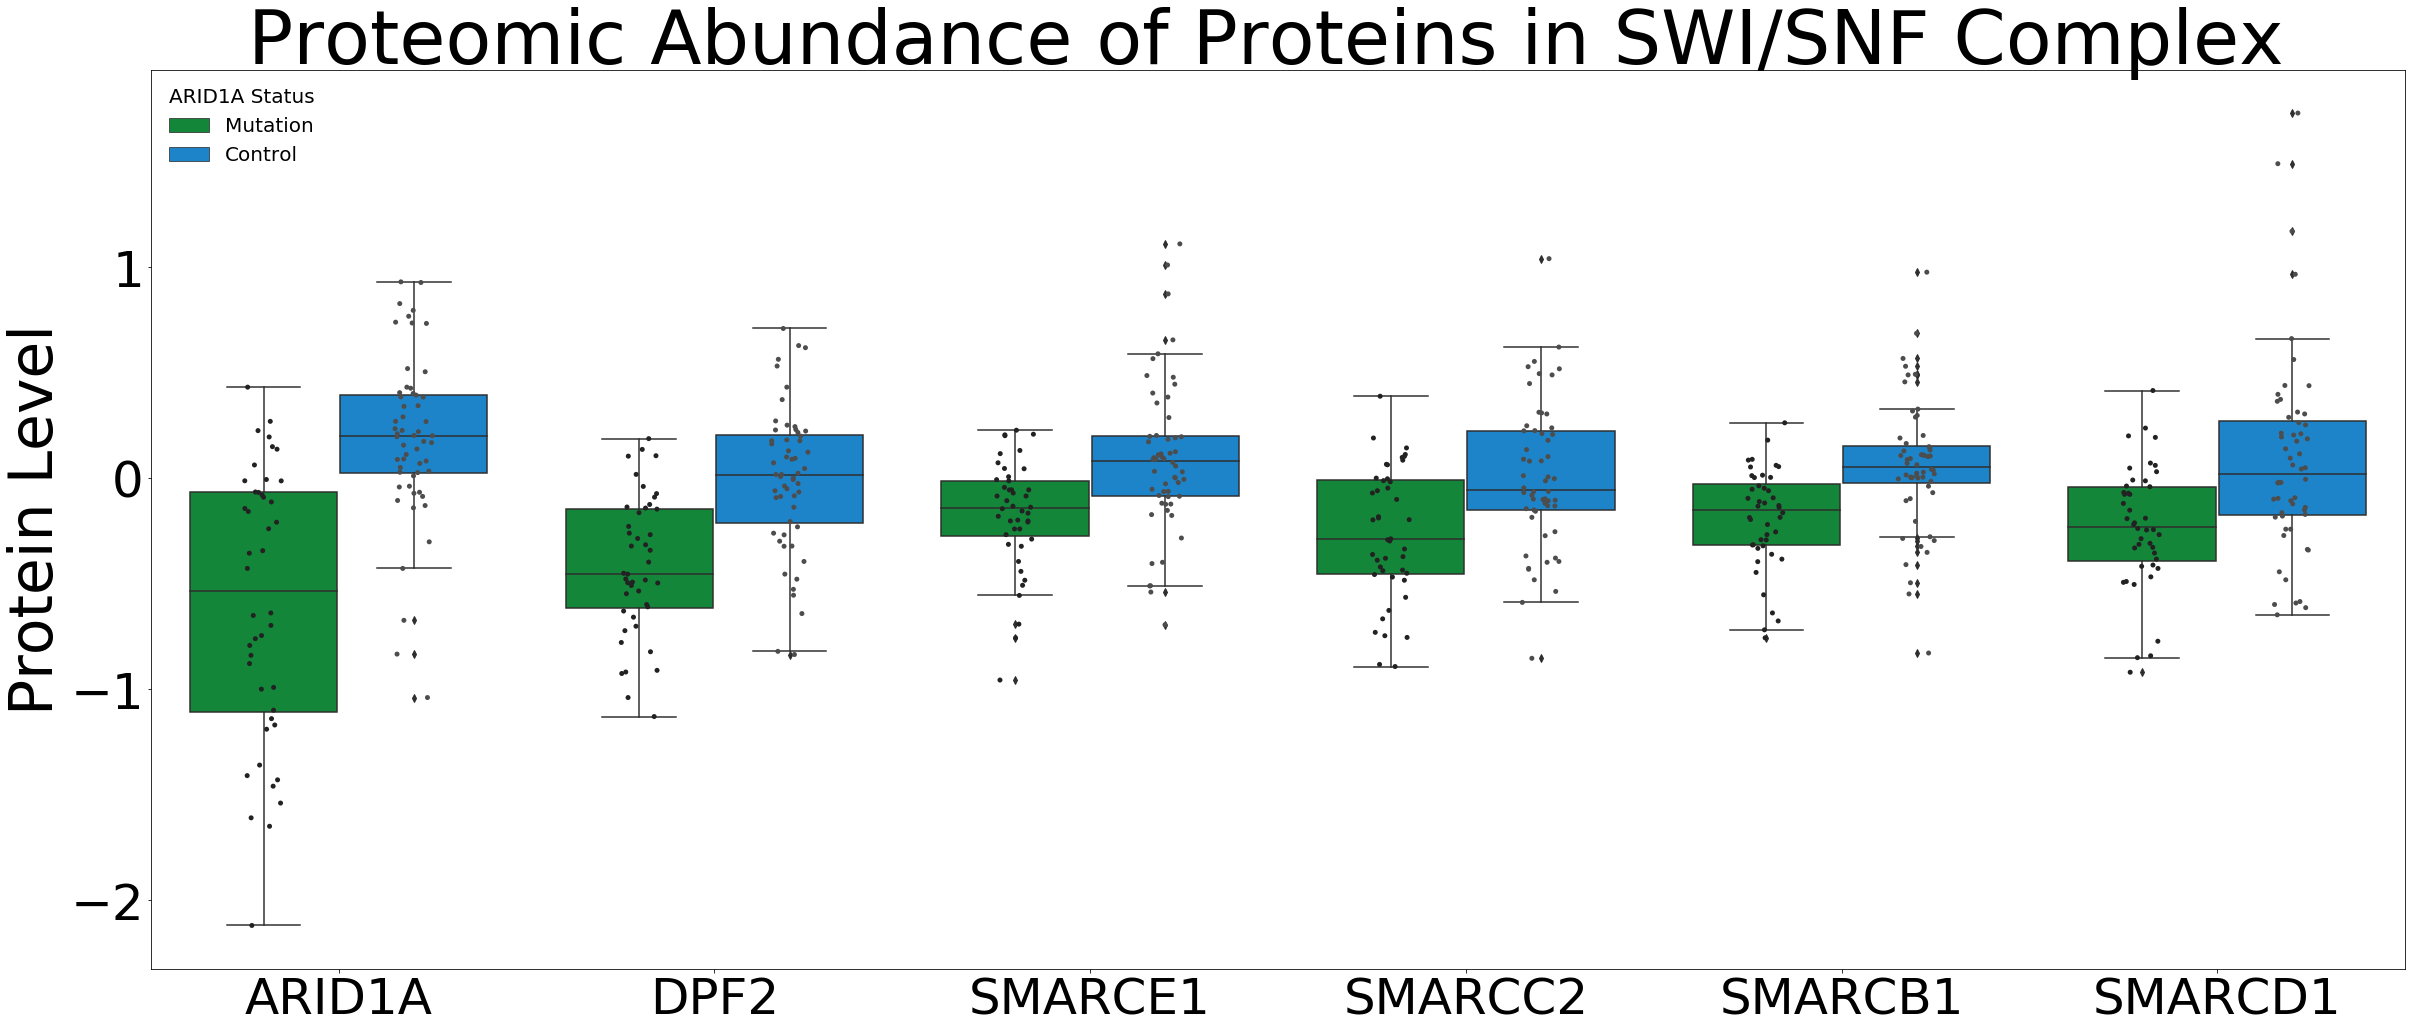

In [8]:
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Mutation": "#009933", "Control": "#008ae6"}

#print(plotdf)

#Create the plot
boxplt = sns.boxplot(x='Protein', y='Signal', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Protein', y='Signal', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Protein Level', fontsize='60')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Proteomic Abundance of Proteins in SWI/SNF Complex ', fontsize = '75')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Mutation', 'Control'], title='ARID1A Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
#boxplt.get_legend().set_bbox_to_anchor((1, 1, 0, 0))


fig = boxplt.get_figure()
plt.show()